Section 1

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv("county_level_election.csv")
df

,state,fipscode,county,population,hispanic,minority,female,unemployed,income,nodegree,bachelor,inactivity,obesity,density,cancer,votergap,trump,clinton
0,Colorado,8117,Summit County,27239,15.173,4.918,45.996,2.5,68352,5.4,48.1,8.1,13.1,46.0,46.2,-27.632,31.530,59.162
1,Colorado,8037,Eagle County,53653,30.040,5.169,47.231,3.1,76661,10.1,47.3,9.4,11.8,31.0,47.1,-19.897,36.058,55.955
2,Idaho,16067,Minidoka County,19226,34.070,5.611,49.318,3.7,46332,24.1,11.8,18.3,34.2,80.0,61.8,54.148,71.135,16.987
3,Colorado,8113,San Miguel County,7558,10.154,4.747,46.808,3.7,59603,4.7,54.4,12.4,16.7,5.7,62.6,-44.769,23.892,68.662
4,Utah,49051,Wasatch County,21600,13.244,4.125,48.812,3.4,65207,9.5,34.4,13.9,23.0,257.8,68.3,25.357,50.471,25.114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3061,Virginia,51103,Lancaster County,11230,1.824,30.059,53.142,6.7,45827,12.0,28.7,25.0,29.8,85.5,425.4,9.971,53.341,43.370
3062,Florida,12125,Union County,14584,5.711,25.791,34.882,4.8,40207,25.2,8.6,31.1,37.1,63.8,427.8,62.410,80.221,17.811
3063,North Dakota,38041,Hettinger County,2343,2.737,6.065,51.775,2.4,50038,12.6,16.0,26.9,29.1,3.4,433.9,68.517,81.840,13.323
3064,Nevada,32011,Eureka County,1707,14.038,8.631,46.875,6.0,70535,11.3,22.9,21.2,27.2,0.2,445.4,75.995,84.660,8.665


In [3]:
'''
1. What is the average votergap, assuming all counties are weighted equally?
'''
ave_coun = df['votergap'].mean()

print("The average votergap is:", ave_coun)

The average votergap is: 31.723198303979103


In [4]:
'''
2. What is the average votergap, assuming all states are weighted equally?
'''
state = df.groupby('state')['votergap'].mean()

ave_state = state.mean()

print("The average votergap is:", ave_state)

The average votergap is: 20.815670013022892


In [5]:
'''
3. Estimate the national overall votergap, assuming the entire population voted? Hint: To get the
votergap overall, you will need to take the population average. Assuming everyone voted, the #
of Clinton voters in a county = % Clinton votes x population
'''
#3. Estimate the national overall votergap, assuming the entire population voted?


total_trump_voters = ((df['trump'] / 100) * df['population']).sum()
total_clinton_voters = ((df['clinton'] / 100) * df['population']).sum()
total_population = df['population'].sum()

national_votergap = (total_trump_voters - total_clinton_voters) / total_population * 100

national_votergap

-2.7885786008686106

Section 2

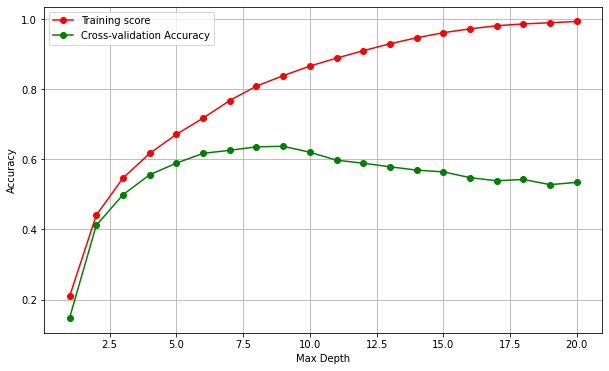

In [7]:
'''
1. Plot the number of nodes (max depth) on the X axis against the accuracy on the y axis, with
separate lines for the training data and the mean cross validation. The following link provides
information about how to plot learning curves using cross validation Hint: Make sure you use
the correct model
'''
X = df.drop(['state', 'county', 'fipscode', 'votergap', 'trump', 'clinton'], axis=1)
y = df['votergap']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_depths = list(range(1, 21))
train_scores = []
cv_scores = []

for depth in max_depths:
    
    model = DecisionTreeRegressor(max_depth=depth)
    train_score = model.fit(X_train, y_train).score(X_train, y_train)
    cv_score = np.mean(cross_val_score(model, X_train, y_train, cv=10))
    train_scores.append(train_score)
    cv_scores.append(cv_score)

plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, 'o-', color="r",label="Training score")
plt.plot(max_depths, cv_scores, 'o-', color="g",label="Cross-validation Accuracy")
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()